In [3]:
import matplotlib.pyplot as plt
import numpy as np
from api.smithwilson import RiskFreeRates

In [25]:
sek_swap20230531 = np.array([0.03955, 0.0363, 0.033716, 0.03193, 0.030886, 0.03019, 0.02976, 0.02944, 0.02924, 0.02917])

In [67]:
CRA = 0.001
maturities = np.array([2, 3, 5, 10])
rates = sek_swap20230531[maturities - 1] - CRA
projection = np.arange(1, 151)
ufr = 0.0345
alpha0 = 0.391017
convergence_maturity = 20
tol = 1e-4

In [68]:
RFR = RiskFreeRates(rates, maturities, projection, ufr, convergence_maturity, tol, None)

In [69]:
alpha, r = RFR.result

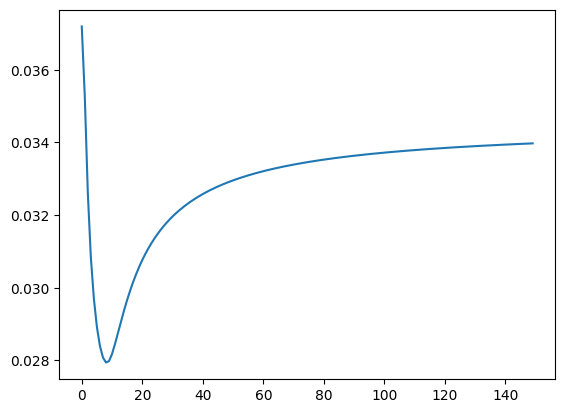

In [70]:
plt.plot(r)

In [71]:
eiopa = np.genfromtxt('../Data/SE_31_5_2023_SWP_LLP_10_EXT_10_UFR_345.csv')

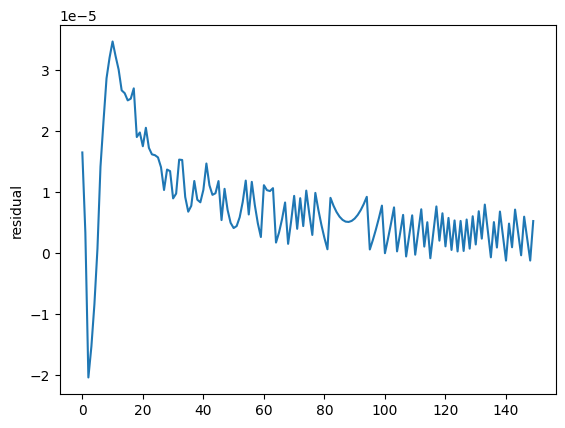

In [72]:
plt.plot(eiopa-r)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.ylabel('residual')
plt.show()

In [73]:
mse = (np.square(eiopa - r)).mean()

In [74]:
print(f'MSE: {mse}, alpha: {alpha}')

MSE: 1.2470797051797787e-10, alpha: 0.3919787961295073


In [75]:
RFR_alpha = RiskFreeRates(rates, maturities, projection, ufr, convergence_maturity, tol, alpha0)

In [76]:
alpha2, r2 = RFR_alpha.result

In [77]:
mse2 = (np.square(eiopa - r2)).mean()

In [78]:
print(f'MSE: {mse2}, alpha: {alpha2}')

MSE: 1.3948885088805536e-10, alpha: 0.391017


In [79]:
f_19 = (1 + r[19])**20/(1 + r[18])**19 - 1
f_19

0.03437334439907325

In [80]:
r[19]

0.030580224775035525

In [81]:
f_20 = (1 + r[20])**21/(1 + r[19])**20 - 1

In [82]:
ufr - f_20

8.557644560316935e-05

In [83]:
(ufr - f_20) / 1e-4

0.8557644560316935